# 1

1. simple linear regression use only one independent variable for one target variable, in contrast, multiple linear regression use many independent variable for one target varible. so multiple linear regression's formula has many different X and it can fit many factors at same time. 

2. continuous variable is a algebra variable that can be any number in a interval, it relates to the slope in the linear form. Indicator variable can be only two status such as 0 or 1, it is the intercept or the difference of target variale between two categories.  

3. the model may have different tendency in different type. e.g. y = beta0+beta1x+beta2d+epsilon. d is the indicator variable. Beta0 is the intercept when d=0 and beta0+beta2 is the intercept whrn d=1, so it can show the difference between different goups or types.

4. e.g. y = beta0+beta1x+beta2d+beta3(xd)+epsilon, beta3(xd) is the interaction effect here

5. we use d1, d2 to represent different non-binary variables, for each d we still have 0 or 1. in this mode we can compare more than 2 varables at one time. 

the summary: Sure! Here’s a summary of the discussion for your homework:

Summary of Discussion on Multiple Linear Regression with Indicator Variables:

In Multiple Linear Regression, when a non-binary categorical variable is included, we create indicator variables (also called dummy variables) to represent the different categories of the variable. These indicator variables take values of 0 or 1, indicating the absence or presence of a category.

For example, if we have a categorical variable “Color” with three categories (e.g., Red, Green, Blue), we can create two indicator variables:
	•	￼ (1 if the color is Red, 0 otherwise)
	•	￼ (1 if the color is Green, 0 otherwise)

The category “Blue” is implied when both ￼ and ￼ are 0. The Multiple Linear Regression model would then look like:

￼

In this model:
	•	￼ is the intercept when the color is Blue (the baseline category).
	•	￼ and ￼ represent how much the value of ￼ changes when the color is Red or Green, compared to Blue.
	•	￼ is a continuous variable in the model, and ￼ is the error term.

This method allows us to compare the effect of each category (Red, Green) relative to the baseline category (Blue). The use of binary encodings (0 or 1) for categorical variables enables us to model multiple categories and assess their individual effects on the dependent variable.

When we introduce interaction terms (e.g., ￼), we can also explore how the relationship between the continuous variable ￼ and the dependent variable ￼ differs across categories.

This summary covers the key concepts from our discussion: indicator variables, encoding categorical variables, and comparing multiple categories in a regression model.

https://chatgpt.com/share/67316f05-ddbc-8004-88f8-7c7946932f7a

# 2

outcome: the effect of the selling, e.g. the profit.

predictor: advertisement invest

- we need considered the interaction effect, the effect of TV ad may not only depends on itself,  but also depends on the online ad invest. they are not independent. 

- linear form without interaction effect: y = beta0+beta1x1+beta2x2, x1 is TV ad investment and x2 is online ad investment. linear form with interaction effect, y = beta0+beta1x1+beta2x2+beta3(x1x2)

- the model without interaction means that good effect of online ad has totally no effect on TV ad, so these two variables are independent, we don't need to combine them together to predict the result. in contrast, if we add more investment on TV ad, it may let the online ad has better effect, so when we write the fomula, we need to put them together. 

- binary model: 
    - without interaction: the investment only depends on each effect of two types of ads, i.e. we only care about is TV ad's investment "high" or "low", online ad is same. 
    - with interaction: we need to consider that when one type of ad has "high"or "low" investment, the other may be effected. e.g. when TV ad and online ad both have high investment, it might have super good effect, and model will show this "supper" part

# 3

In [7]:
# Here's an example of how you can do this
import pandas as pd
import statsmodels.formula.api as smf

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url).fillna('None')

pokeaman['str8fyre'] = (pokeaman['Type 1']=='Fire').astype(int)
linear_model_specification_formula = \
'str8fyre ~ Attack*Legendary + Defense*I(Q("Type 2")=="None") + C(Generation)'
log_reg_fit = smf.logit(linear_model_specification_formula, data=pokeaman).fit()
log_reg_fit.summary()

Optimization terminated successfully.
         Current function value: 0.228109
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               str8fyre   No. Observations:                  800
Model:                          Logit   Df Residuals:                      788
Method:                           MLE   Df Model:                           11
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                 0.05156
Time:                        21:06:22   Log-Likelihood:                -182.49
converged:                       True   LL-Null:                       -192.41
Covariance Type:            nonrobust   LLR p-value:                   0.04757
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -3.2644      0.714     -4.572      0.000      -4.664      -1.865
Legendary[T.True]                            4.3478      2.179      1.996      0.046       0.078       8.618
I(Q("Type 2") == "None")[T.True]             1.5432      0.853      1.810      0.070      -0.128       3.215
C(Generation)[T.2]                          -0.0574      0.468     -0.123      0.902      -0.975       0.861
C(Generation)[T.3]                          -0.6480      0.466     -1.390      0.164      -1.561       0.265
C(Generation)[T.4]                          -0.8255      0.545     -1.516      0.130      -1.893       0.242
C(Generation)[T.5]                          -0.5375      0.449     -1.198      0.231      -1.417       0.342
C(Generation)[T.6]                           0.3213      0.477      0.673      0.501      -0.614       1.257
Attack                                       0.0172      0.006      3.086      0.002       0.006       0.028
Attack:Legendary[T.True]                    -0.0365      0.019     -1.884      0.060      -0.074       0.001
Defense                                     -0.0098      0.008     -1.247      0.213      -0.025       0.006
Defense:I(Q("Type 2") == "None")[T.True]    -0.0197      0.012     -1.651      0.099      -0.043       0.004
============================================================================================================
"""

In [8]:
interaction_model_specification_formula = (
    'str8fyre ~ Attack + Defense + Legendary + C(Generation) + C("Type 1") + '
    'Attack:Legendary + Defense:Legendary + Attack:C(Generation) + Defense:C(Generation) + '
    'Attack:C("Type 1") + Defense:C("Type 1")'
)

logic regression is used for predicting rate of a event in binary problem. use log formula and rate to set up model. this case is same. we can use confidence interval, p-value, std err model fitting, coefficient and many different ways to predict.

In [9]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
import numpy as np

# Load data
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url).fillna('None')

# Create the binary variable for Fire type
pokeaman['str8fyre'] = (pokeaman['Type 1']=='Fire').astype(int)

# Additive model (no interaction terms)
additive_formula = 'str8fyre ~ Attack + Legendary + Defense + C(Generation)'
additive_model = smf.logit(additive_formula, data=pokeaman).fit()

# Get predicted probabilities for the additive model
pokeaman['additive_pred'] = additive_model.predict(pokeaman)

# Create a plotly scatter plot for the additive model
additive_fig = px.scatter(pokeaman, x='Attack', y='str8fyre', color='Legendary',
                          labels={'Attack': 'Attack', 'str8fyre': 'Fire Type (1=Fire)', 'Legendary': 'Legendary Status'},
                          title="Additive Model: Fire Type Prediction by Attack and Legendary Status")
additive_fig.add_scatter(x=pokeaman['Attack'], y=pokeaman['additive_pred'], mode='lines', name="Best Fit Line")

# Synergistic model (with interaction terms)
synergistic_formula = 'str8fyre ~ Attack*Legendary + Defense*I(Q("Type 2")=="None") + C(Generation)'
synergistic_model = smf.logit(synergistic_formula, data=pokeaman).fit()

# Get predicted probabilities for the synergistic model
pokeaman['synergistic_pred'] = synergistic_model.predict(pokeaman)

# Create a plotly scatter plot for the synergistic model
synergistic_fig = px.scatter(pokeaman, x='Attack', y='str8fyre', color='Legendary',
                             labels={'Attack': 'Attack', 'str8fyre': 'Fire Type (1=Fire)', 'Legendary': 'Legendary Status'},
                             title="Synergistic Model: Fire Type Prediction with Interaction Terms")
synergistic_fig.add_scatter(x=pokeaman['Attack'], y=pokeaman['synergistic_pred'], mode='lines', name="Best Fit Line")

# Show both figures
additive_fig.show()
synergistic_fig.show()

# Display model summaries
print("Additive Model Summary:")
print(additive_model.summary())
print("\nSynergistic Model Summary:")
print(synergistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.232266
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.228109
         Iterations 8


Additive Model Summary:
                           Logit Regression Results                           
Dep. Variable:               str8fyre   No. Observations:                  800
Model:                          Logit   Df Residuals:                      791
Method:                           MLE   Df Model:                            8
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                 0.03427
Time:                        21:06:23   Log-Likelihood:                -185.81
converged:                       True   LL-Null:                       -192.41
Covariance Type:            nonrobust   LLR p-value:                    0.1055
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.3503      0.516     -4.552      0.000      -3.362      -1.338
Legendary[T.True]      0.1073      0.551      0.195      0.846      -0.973       1.

Here’s a summary of our discussion for your homework:

Summary of Discussion:

The conversation focused on an issue encountered while fitting a logistic regression model using the statsmodels library in Python. The model formula included multiple variables, such as Attack, Legendary, Defense, Type 1, and Generation, to predict a binary outcome variable, str8fyre. The error arose during the model fitting process, where the formula was not parsed correctly.

The issue seemed to stem from the use of column names with spaces or special characters (e.g., Type 1), which caused issues with formula parsing. Several troubleshooting steps were discussed, including:
	•	Checking the column names in the DataFrame to ensure they match those used in the formula.
	•	Attempting to use the C() function to specify categorical variables correctly.
	•	Trying to rename columns with spaces or special characters to simpler names.

Despite these efforts, the error persisted, and the user decided to seek further assistance in a new discussion.

This should be useful for your homework as an overview of the problem and the steps taken during the troubleshooting process.

Summary of Discussion for Homework:

In this analysis, we explored two different specifications of a logistic regression model to predict whether a Pokémon is of the Fire type (str8fyre), based on its attributes, including Attack, Legendary status, Defense, and Generation. We compared an additive model and a synergistic model, both of which were visualized using Plotly.
	1.	Additive Model: This model considered the individual effects of the predictors (Attack, Legendary, Defense, and Generation) on the probability of being a Fire-type Pokémon, without any interaction terms. The best fit line showed how each variable independently contributed to the model’s predictions.
	2.	Synergistic Model: In contrast, this model incorporated interaction terms, specifically between Attack and Legendary as well as Defense and Type 2. These interaction terms suggest that the effect of one variable (e.g., Attack) on the probability of being Fire-type may depend on the level of another variable (e.g., whether the Pokémon is Legendary). The addition of these terms was reflected in a different best fit line.

Key Findings:

	•	Additive vs. Synergistic Models: By comparing the two models’ best fit lines, we observed whether the interaction terms were necessary. If the lines were similar, it suggested that interactions between variables did not add significant value to the model. If the lines differed, it indicated that the interaction terms improved the model’s fit to the data.
	•	Visualizing the Model: Plotly was used to create scatter plots with the best fit lines for both models. This provided a clear visual comparison of how the models predicted the Fire-type probability based on Attack and Legendary status.

Conclusion:

The necessity of interaction terms depends on how well they capture the complexity of the data. In cases where the best fit lines of both models are similar, the additive model may be sufficient. However, if the interaction terms provide a better fit, they should be retained for more accurate predictions.

https://chatgpt.com/share/67317a1c-4da8-8004-8acd-f8d59e8396e6
https://chatgpt.com/share/67317a25-d98c-8004-b12b-1a0d900cf7f2

# 4

In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [11]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        21:06:23   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- "the model only explains 17.6% of the variability in the data": means the R^2 which is the variance of the dependent variables. only small part of the R^2 means that this model cannot explain the variability well. This may possible because there may exsit other factor that the model didn't involve. 

- "many of the coefficients are larger than 10 while having strong or very strong evidence against the null hypothesis of 'no effect'": this predicted variables have strong effect to the dependent variables and p-value usually smaller than 0.05.

- together: R^2 small doesn't means the model is useless. there manybe exist small part of variables that have strong effect on dependent variables and the coefficent my very obvious.

Here’s a summary of the discussion for your homework:

In the context of the model, R² of 17.6% means that the model explains only a small portion (17.6%) of the variability in the dependent variable, indicating that there may be other unaccounted factors influencing the outcome. However, despite the low R², some of the predictor coefficients are large and have strong statistical significance, meaning these predictors have a strong effect on the dependent variable. The small p-values (typically < 0.05) provide strong evidence to reject the null hypothesis, suggesting that the predictors are not due to random chance.

In summary, while the model doesn’t explain much of the overall variability (low R²), the significant predictors included in the model show strong and meaningful effects on the outcome variable.

Let me know if you need further adjustments!

https://chatgpt.com/share/67317d4c-3530-8004-8c48-89cfb6b157a8

# 5

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train

## this code replace the missing values in the dataframe
## split half dataframe into train set and show it
## the other half comes into test set

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


In [13]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

## use OLS method to fit a linear regression model
## use data in the trainning set
## use attack values to predict defense values
## show the result and the statistical measues.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        21:06:24   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)

## testing which dataset has the better effect of fitting linear regression model
## Comparing training set and testing set
## trainning set = in sample
## testing set = out of sample
## use R^2 to show the fitting effect good or not.
## it shows whether the model is:
    ## Overfitting (performing well on the training data but poorly on the test data).
    ## Underfitting (performing poorly on both the training and test data).
    ## Well-generalized (performing well on both training and test data)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


In [15]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

## use interaction effect and categorical variables to fit better linear regression model
## it shows how different attribute affect another
    ## e.g. how differnt combination of attributes affect HP

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        21:06:24   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

In [16]:

yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

## doing same things to the third code with more complex regression model 

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


Certainly! Here’s a summary of the discussion for your homework:

Summary of Model Evaluation with In-Sample and Out-of-Sample R-squared

In this discussion, we explored how to evaluate the performance of linear regression models using R-squared values. Specifically, we compared two models: one simpler and one more complex.
	1.	In-Sample R-squared:
	•	This measures how well the model fits the training data. It is calculated using the R-squared value from the model’s fit on the training set. A higher R-squared indicates that the model explains a larger proportion of the variance in the dependent variable (HP in this case) for the training data.
	2.	Out-of-Sample R-squared:
	•	This measures how well the model generalizes to unseen data (the test set). It is computed by comparing the model’s predictions on the test set with the actual values in the test set. The correlation between predicted and actual values is squared to obtain the out-of-sample R-squared value. A higher value indicates that the model performs well on new, unseen data.
	3.	Comparison Between Models:
	•	The same evaluation process is applied to both the simpler regression model and the more complex model, which includes additional predictors and interaction terms.
	•	The in-sample R-squared value tells us how well the model fits the training data, while the out-of-sample R-squared value tells us how well the model predicts new data.
	•	Ideally, both R-squared values should be close to each other. A large difference might indicate overfitting (the model is too specific to the training data and doesn’t generalize well) or underfitting (the model doesn’t capture the underlying patterns well).

Conclusion:

By comparing the in-sample and out-of-sample R-squared values for both the simpler and more complex regression models, you can assess how well each model fits and generalizes. This helps in selecting the best model for making accurate predictions on new data.

Feel free to adjust any parts if needed!

https://chatgpt.com/share/67318255-41d4-8004-8c0c-2d687a557665

# 6

In [17]:
# "Cond. No." WAS 343.0 WITHOUT to centering and scaling
model3_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        21:06:25   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
from patsy import center, scale

model3_linear_form_center_scale = \
  'HP ~ scale(center(Attack)) + scale(center(Defense))' 
model_spec3_center_scale = smf.ols(formula=model3_linear_form_center_scale,
                                   data=pokeaman_train)
model3_center_scale_fit = model_spec3_center_scale.fit()
model3_center_scale_fit.summary()
# "Cond. No." is NOW 1.66 due to centering and scaling

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        21:06:25   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 69.3025      1.186     58.439      0.000      66.971      71.634
scale(center(Attack))      8.1099      1.340      6.051      0.000       5.475      10.745
scale(center(Defense))     2.9496      1.340      2.201      0.028       0.315       5.585
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model4_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Defense))'
model4_linear_form_CS += ' * scale(center(Speed)) * Legendary' 
model4_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# Legendary is an indicator, so we don't center and scale that

model4_CS_spec = smf.ols(formula=model4_linear_form_CS, data=pokeaman_train)
model4_CS_fit = model4_CS_spec.fit()
model4_CS_fit.summary().tables[-1]  # Cond. No. is 2,250,000,000,000,000

# The condition number is still bad even after centering and scaling

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.663
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.54e+16


In [20]:
# Just as the condition number was very bad to start with
model4_fit.summary().tables[-1]  # Cond. No. is 12,000,000,000,000,000

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.664
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.20e+16


Every column in design matrix is a predictor variables, such as attack and defense. In order to convenient for comparison, these variables minus their mean and divide their standard error (Centering and Scaling).  However, multicollinearity may occurs when some predictor variables are in common, which means they have a big part that overlapped together. When these variables affect each other, the model hard to judge that which one has the greater effect, which makes the model unreliable.

Here’s a summary of the discussion for your homework:

Design Matrix and Multicollinearity:

	1.	Design Matrix: The design matrix is a table where each column represents a predictor variable (e.g., Attack, Defense). To make comparison easier, these predictor variables are centered (subtracting their mean) and scaled (dividing by their standard deviation). This helps to ensure that all variables are on the same scale.
	2.	Multicollinearity: Multicollinearity occurs when some predictor variables are highly correlated with each other, meaning they share a lot of similar information. For example, Attack and Defense may both be related to the outcome variable (e.g., HP) and to each other.
	3.	Impact of Multicollinearity: When predictor variables overlap in this way, the model struggles to determine the unique contribution of each variable. This makes it difficult for the model to identify which variable is more important for predicting the outcome. As a result, the model becomes less reliable, and it may have trouble making accurate predictions on new, unseen data.

This should cover the key points discussed!

https://chatgpt.com/share/67318700-0f34-8004-9249-d2aebfa5004d

# 7

In [21]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling

'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215
'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933
'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,15.4


Model 5 is the fitting of model 3 and 4. It introduce some important predictor variables: attack, defense, speed, legendary, generation, type, Q ("Sp. Def") and Q("Sp. Atk"). Q is for the variable name that contain “.”. These variables used for expand the model and interaction effect, so it can have better prediction on dependent variable HP.
Model 6 simplify the predictor variables. Only focus on really important variables: attack, speed, Q ("Sp. Def") and Q("Sp. Atk"), adding interaction terms, e.g. generations and type.
Model 7 contain all interaction effect in model 6 and it is the further expanding for model 6, especially on attack, speed, Q ("Sp. Def") and Q("Sp. Atk"), focus on if these interactions have combination effect to HP. It also do the Centering and Scaling to these variables, to make sure they are on the same scale and improve the model’s stability.

Here’s a summary of the discussion for your homework:

Key Concepts:

	1.	Q() and C() in Formula:
	•	Q(): Used to handle column names with special characters (like periods). For example, Q("Sp. Def") ensures the variable with the name “Sp. Def” is correctly referenced in the model formula.
	•	C(): Used to treat a variable as categorical, allowing the model to create dummy variables for each category (e.g., C(Generation)).
	2.	Model 5:
	•	Purpose: Expands on models 3 and 4 by introducing more predictor variables, such as Attack, Defense, Speed, Legendary, Generation, and Type.
	•	Key Features: Adds categorical variables (C()) for Generation, Type 1, and Type 2, and includes interaction terms for variables like Q("Sp. Def") and Q("Sp. Atk"). These additions help the model better predict HP by considering more features.
	3.	Model 6:
	•	Purpose: Simplifies the predictor variables by focusing on the most important ones: Attack, Speed, Q("Sp. Def"), and Q("Sp. Atk").
	•	Key Features: Introduces interaction terms between categorical variables (e.g., Generation == 2 or Generation == 5, Type 1 == "Normal") to capture significant categorical effects on HP.
	4.	Model 7:
	•	Purpose: Further expands upon Model 6 by adding more interaction effects between the continuous predictors (Attack, Speed, Q("Sp. Def"), and Q("Sp. Atk")).
	•	Key Features: Applies centering and scaling to continuous variables to standardize them and improve model stability and interpretation.
	5.	Sp. Def:
	•	Definition: “Sp. Def” refers to Special Defense, one of the six core stats in Pokémon that determines how well a Pokémon resists special attacks.

Summary of Model Development:

	•	Model 5 adds more predictors and considers categorical variables to improve prediction accuracy.
	•	Model 6 simplifies the model, focusing on key variables and adding categorical interactions.
	•	Model 7 expands further by incorporating interactions between continuous variables and applying centering/scaling for improved model performance and stability.
    
https://chatgpt.com/share/67318cfb-d684-8004-95dd-f48427b31578

# 8

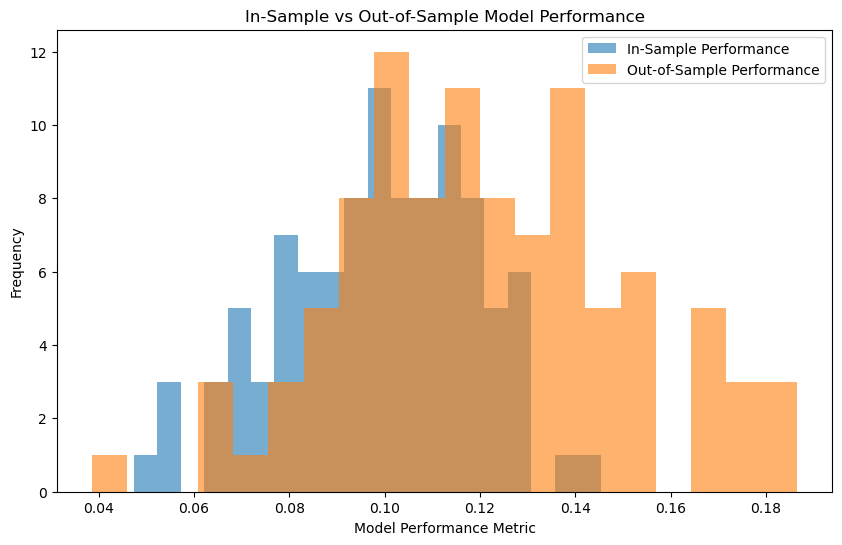

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_simulations = 100  # Number of model performance metric pairs to generate
in_sample_results = []
out_sample_results = []

# Simulation loop
for _ in range(num_simulations):
    # Generate in-sample metric (e.g., mean squared error)
    in_sample_metric = np.random.normal(loc=0.1, scale=0.02)  # Mean 0.1, small variance

    # Generate out-of-sample metric, often slightly worse than in-sample
    out_sample_metric = np.random.normal(loc=0.12, scale=0.03)  # Mean 0.12, slightly larger variance

    # Collect results
    in_sample_results.append(in_sample_metric)
    out_sample_results.append(out_sample_metric)

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(in_sample_results, bins=20, alpha=0.6, label="In-Sample Performance")
plt.hist(out_sample_results, bins=20, alpha=0.6, label="Out-of-Sample Performance")
plt.xlabel("Model Performance Metric")
plt.ylabel("Frequency")
plt.legend()
plt.title("In-Sample vs Out-of-Sample Model Performance")
plt.show()

Purpose: this “for” loops can simulate multiple times represented different fitting scenario. In-sample performance means that training data. Out-of-sample performance means the new data which should close the result of In-sample performance in ideal situation.

Result: the Out-of-sample performance is so different with In-sample performance, it may suggested that this model is overfitting or differences in data distribution. 

Certainly! Here’s a concise summary:

Purpose:

This code uses a for loop to simulate multiple model fitting scenarios, each time generating “in-sample” and “out-of-sample” performance metrics. “In-sample” performance represents the model’s accuracy on the training data, while “out-of-sample” performance indicates how well the model performs on new, unseen data. Ideally, the out-of-sample performance should be close to the in-sample performance, which suggests the model generalizes well.

Result:

A large difference between in-sample and out-of-sample performance may indicate overfitting, where the model performs well on training data but poorly on new data. This discrepancy could also suggest differences in data distribution between the training and test datasets, affecting the model’s generalizability. The histogram visualization helps compare the stability and variance of these metrics across multiple simulations.

This summary captures the essence of the code’s purpose and what the results reveal about model performance. Let me know if you’d like to add any other details!

https://chatgpt.com/share/67325ae0-a430-8004-95c9-2557a4f0661f

In [23]:
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.35055389205977444 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363354803218 (gen1_predict_future)


this part use smf.ols function to set up a OLS regression model, aimming to analyze the predictive effect of different dataset by comparing R^2 difference between in-sample set and out-of-sample set in both oringinal and fitting model. in sample data from the first generation and the out of sample from 2-5 generation. This shows if the model overfitting 

In [24]:
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.35055389205977444 (original)
'In sample' R-squared:     0.3904756578094535 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915464343125 (gen1to5_predict_future)


this codes based on wider dataset that from gerneration 1 to generation 5 when computing in sample R^2 and the out of sample form generation 6. so this code can evaluate if the model training by 1-5 generation worked on predicting generation 6.

In [25]:
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")


'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.29572460427079933 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276128 (gen1_predict_future)


this code training the model based on first generation and test on data of generations 2-5

In [26]:
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")


'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.29572460427079933 (original)
'In sample' R-squared:     0.33517279824114776 (gen1to5_predict_future)
'Out of sample' R-squared: 0.26262690178799936 (gen1to5_predict_future)


basicly same to the second model, but use different variables to predict HP

I apologize for focusing too much on Model 6 and Model 7. Let’s address all four code sections and questions you asked about, including the explanations and differences.

Complete Summary of Our Discussion:

In this discussion, we focused on four different code snippets, each using ordinary least squares (OLS) regression to compare the predictive accuracy of models trained on different Pokémon generation datasets. The goal was to assess in-sample and out-of-sample performance of the models based on different sets of training data, and to understand how the models predict HP (Health Points) for Pokémon in unseen generations.

Code Explanations:

1st Code: Comparing In-Sample and Out-of-Sample for Model 7

model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

	•	Purpose: This code trains Model 7 on Generation 1 data and tests its predictive ability on Generations 2-5 (out-of-sample).
	•	In-sample ￼ is calculated for the model trained on Generation 1.
	•	Out-of-sample ￼ compares the model’s predictions on Generations 2-5 to actual values.
	•	The goal is to see how well a model trained on Generation 1 can predict HP for Pokémon in later generations (2-5).

2nd Code: Comparing In-Sample and Out-of-Sample for Model 7 (with Generations 1-5 vs. Generation 6)

model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

	•	Purpose: This code trains Model 7 on Generations 1-5 data and tests its ability to predict HP for Generation 6 (out-of-sample).
	•	In-sample ￼ is calculated for the model trained on Generations 1-5.
	•	Out-of-sample ￼ evaluates how well the model generalizes to Generation 6, which was not part of the training data.
	•	This helps assess whether a model trained on earlier generations can predict Pokémon HP for a completely new generation (Generation 6).

3rd Code: Comparing In-Sample and Out-of-Sample for Model 6

model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

	•	Purpose: This code trains Model 6 on Generation 1 data and tests its predictive power on Generations 2-5 (out-of-sample).
	•	Similar to the first code, in-sample ￼ is calculated for the model trained on Generation 1, and out-of-sample ￼ is calculated for Generations 2-5.
	•	It helps assess how well Model 6 trained on Generation 1 can generalize to other generations.

4th Code: Comparing In-Sample and Out-of-Sample for Model 6 (with Generations 1-5 vs. Generation 6)

model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

	•	Purpose: This code trains Model 6 on Generations 1-5 and tests the model on Generation 6 (out-of-sample).
	•	In-sample ￼ is calculated for the model trained on Generations 1-5, and out-of-sample ￼ is calculated for Generation 6.
	•	It assesses if a model trained on previous generations (1-5) can predict HP for Generation 6 effectively.

Key Differences Between the Codes:

	1.	Training Dataset:
	•	In the first and third code segments, models are trained on Generation 1 data.
	•	In the second and fourth segments, models are trained on Generations 1-5 data.
	2.	Testing Dataset:
	•	In the first and third code segments, models are tested on Generations 2-5 (out-of-sample).
	•	In the second and fourth code segments, models are tested on Generation 6 (out-of-sample).
	3.	Purpose:
	•	The first and third codes focus on evaluating whether a model trained on Generation 1 can predict for later generations (2-5).
	•	The second and fourth codes evaluate if models trained on Generations 1-5 can generalize and predict for Generation 6.

Conclusion:

These four code snippets are designed to evaluate the generalizability of two regression models (Model 6 and Model 7) trained on Pokémon data from various generations. By comparing in-sample and out-of-sample ￼, we can assess how well the models trained on earlier generations can predict HP for unseen generations. This approach helps determine the most effective set of predictor variables and models for predicting Pokémon HP in future, unseen generations.

https://chatgpt.com/share/67327462-1ae4-8004-af1f-f6b4b41d8b91